# 라이브러리 설치

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm, tqdm_notebook

In [2]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:13 https://developer.

bash: line 6: fg: no job control
bash: line 8: fg: no job control
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0   988k      0  0:00:01  0:00:01 --:--:-- 10.2M
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source

# 데이터 준비

In [3]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [112]:
# 데이터셋 불러오기
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/데캡디/review_link10.csv')

In [113]:
# 데이터 합치기
df.head()

,상품명,리뷰,index
0,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),이브랜드는 올리브영 입점전부터 써본브랜드입니다\n수분크림구매시에 성분이 중요한데요\...,0
1,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),전에 어찌어찌하다 자작나무 수분크림 샘플을 받아 잘 쓰고 있는 중에\n1+1행사한다...,1
2,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),올리브영 대표 클린뷰티! 라운드랩!\n\n# 라운드랩 자작나무 수분 크림 \n\n✔...,2
3,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),💚수분감\n진짜 내가 찾던 수분만 있는 제품.. 유분은 기름종이 보시면 알겠지만 1...,3
4,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),원쁠원 행사 넘 좋아요 이번달 끝나기 전에 하나 더 사놓을까 고민이 되네요 .. ❄...,4


In [114]:
df_product_name = df['상품명'].unique()

In [115]:
df['상품명'].unique()

array(['★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매)',
       '아누아 어성초 77 수딩토너 기획세트 (350ml+40ml+화장솜60매)',
       '아비브 어성초 카밍 토너 스킨부스터 더블 기획',
       '라운드랩 1025 독도 토너 대용량 500ml 기획(토너 100ml 증정)',
       '★세븐틴 승관 토너★브링그린 티트리 시카 수딩 토너 510mL(대용량)',
       '라로슈포제 에빠끌라 H토너 토너패드 기획(+순면패드, 듀오 에센스 15ml, 포밍크림 15ml)',
       '넘버즈인 3번 결광가득 에센스 토너 200ml',
       '[온라인단독] 아이소이 잡티세럼Ⅱ 20ml 더블세트+잡티크림 30ml 한정기획',
       '랩시리즈 레스큐 워터로션 200ml+30mlx2 기획',
       '더랩바이블랑두 올리고 히알루론산 5000토너 200ml 기획세트 (토너100ml 증정)'], dtype=object)

In [116]:
df = df[df['상품명'] == df_product_name[2]]

# 데이터 전처리

In [117]:
# 해당 문장 제거
string =  '※ 해당 리뷰는 원칙적으로 기본 상품이 동일한 단품 사용 후 작성된 것이며,개별 상품에 따라 용량 내지 일부 구성(1+1, 기획상품 등)이 상이할 수 있음을 안내드립니다.'

review_clean = []
for i in range(len(df)):
    temp = df['리뷰'].iloc[i]
    review_clean.append(temp.replace(string, ""))

In [118]:
df['리뷰'] = review_clean

In [119]:
df['리뷰'] = df['리뷰'].str.replace('\n',' ')
df['리뷰'] = df['리뷰'].str.replace('  ',' ')

target_string = ['피부타입', '복합성에 좋아요', '피부고민', '진정에 좋아요', '자극도', '자극없이 순해요']
df = df[~df['리뷰'].map(lambda x: all(string in x for string in target_string))]

In [120]:
df

,상품명,리뷰,index
1988,아비브 어성초 카밍 토너 스킨부스터 더블 기획,💟후기💟 저는 아비브 찐팬이고 아비브 제품도 정말 여러가지 사용해봤는데 정말 그 중...,1988
1989,아비브 어성초 카밍 토너 스킨부스터 더블 기획,평소에도 얼굴에 열감 많아서 홍조도 있고 특히 운동 끝나고 열감이 금방 떨어지지 않...,1989
1990,아비브 어성초 카밍 토너 스킨부스터 더블 기획,💬 재구매 의사 200% 💬 산뜻하고 청량한 사용감과 눈에 띄는 진정효과 💬 부담스...,1990
1991,아비브 어성초 카밍 토너 스킨부스터 더블 기획,"🌱 아비브 어성초 진정라인 좋아하시는 분들!! 얼른 사용해보세요 :) 🌱 수부지, ...",1991
1992,아비브 어성초 카밍 토너 스킨부스터 더블 기획,아비브 신상 어성초 토너 체험하게 되어 너무 좋네요 우선 택배로 받았을때 케이스며 ...,1992
...,...,...,...
3155,아비브 어성초 카밍 토너 스킨부스터 더블 기획,아비브 제품이 어성초 효과를 가장 극대화 시켜주는 것 같아서 좋아용,3155
3156,아비브 어성초 카밍 토너 스킨부스터 더블 기획,영양감은 거의 없는것같고 수분 많은 토너입니다 원래 닦토 목적으로 구매한거라 잘쓰고...,3156
3157,아비브 어성초 카밍 토너 스킨부스터 더블 기획,바르고 나면 건조해지는 토너가 아니라 촉촉하게 수분을 잡아줘서 좋아요,3157
3158,아비브 어성초 카밍 토너 스킨부스터 더블 기획,아비브는 믿고사는 아벤느와 같아요. 순하고 진정좋습니다.,3158


# 데이터 정제 - 한글만 추출

In [121]:
import re
# 기호, 숫자, 영어 등은 다 제외하고 한글만 남김
df['리뷰'] = [re.sub('[0-9]+', '', str(e)) for e in df['리뷰']]
df['리뷰'] = df['리뷰'].str.replace(pat=r'[^\w]', repl=r' ', regex=True)
df.head()

,상품명,리뷰,index
1988,아비브 어성초 카밍 토너 스킨부스터 더블 기획,후기 저는 아비브 찐팬이고 아비브 제품도 정말 여러가지 사용해봤는데 정말 그 중...,1988
1989,아비브 어성초 카밍 토너 스킨부스터 더블 기획,평소에도 얼굴에 열감 많아서 홍조도 있고 특히 운동 끝나고 열감이 금방 떨어지지 않...,1989
1990,아비브 어성초 카밍 토너 스킨부스터 더블 기획,재구매 의사 산뜻하고 청량한 사용감과 눈에 띄는 진정효과 부담스럽지 ...,1990
1991,아비브 어성초 카밍 토너 스킨부스터 더블 기획,아비브 어성초 진정라인 좋아하시는 분들 얼른 사용해보세요 수부지 ...,1991
1992,아비브 어성초 카밍 토너 스킨부스터 더블 기획,아비브 신상 어성초 토너 체험하게 되어 너무 좋네요 우선 택배로 받았을때 케이스며 ...,1992


In [122]:
df.iloc[0]['리뷰']

' 후기  저는 아비브 찐팬이고 아비브 제품도 정말 여러가지 사용해봤는데 정말 그 중에서도 최고라고 할 수 있는 제품이 바로 이 아비브 어성초 토너에요     진짜 제가 써본 토너 중에서 가장 좋고  아비브 제품 중에서도 가장 호불호 없이  극호 로 사용할 수 있는 제품이에요   저는 여태까지 마녀공장 비피다 토너  비욘드 아쿠아 토너  닥터지 블랙스네일 에센스워터  마몽드 로즈워터 토너 등 정말 다양하게 토너를 사용했었어요ㅎㅎ 물론 이 중에서 마녀공장 토너를 제외하고는 다 무난하게 잘 맞았지만  딱 이거다 하는 제품은 없었거든요      제가 기초유목민이라ㅠ   근데 정말 아비브 어성초 토너는 정말 딱 쓰자마자  이거다  싶었어요ㅋㅋㅋㅋ  그냥 제형은 완전 물토너인데 엄청 보습이 좋아요     에센스 제형도 아니고 끈적임이 있는 제형이 전혀 아니라 보습감에 크게 기대가 없었는데 엄청 촉촉해요     제가 완전 건성에 아토피까지 있는데 정말 토너 하나만 발랐을 때도 얼굴 당김이 전혀 없어요  물론 저는 건성이라 토너로만 기초를 마무리 하지는 않지만 토너를 바르고 나서 흡수시킬 때 얼굴 당김이 있었는데 이거는 그 시간 동안 절대 건조하거나 당김이 없어요    지성피부인 분들은 여름에는 이 토너 하나만으로도 기초 마무리해도 될 거 같더라구요ㅋㅋㅋ 정말 촉촉함은 대박인데 바르고 나서 흡수되고 나서도 끈적임이나 유분감이 없어요ㅋㅋㅋ 제가 써본 토너 중에서 정말 제일 좋아요    제 쌍둥이 언니가 엄청 피부가 예민하고 아토피가 심해서 대학병원 피부과를 다니는데 언니도 이거 사용해 보더니 엄청 좋다고 자기도 토너 이 제품으로 갈아탄다고 했어요   피부가 예민하다 보니까 웬만해서는 제품 잘 안 바꾸고 제품 사용할 때도 엄청 까다롭게 고르는데 이 제품은 몇 번 사용하더니 바로 넘어왔어요  그 만큼 순하고 자극없으면서 보습도 좋습니다     추천    추천하는 피부 타입은 건성  지성  복합성 다 좋을 거 같아요   지성이신 분은 여름에는 이 토너 하나로 기초 마무리하셔도 될

# 형태소 분석

In [123]:
import nltk
import konlpy
from konlpy.utils import pprint
from konlpy.tag import Mecab

In [124]:
# 형태소 분석 # 명사 추출

def clean_text(text):
    text = text.replace(".", " ").strip()
    text = text.replace(".", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]+'
    text = re.sub(pattern=pattern, repl="", string=text)
    return text

def get_nouns(tokenizer, sentence):
    tagged = tokenizer.pos(sentence)
    nouns = [s for s, t in tagged if t in ['SL', 'NNG', 'NNP'] and len(s) > 1]
    return nouns

def tokenize(df):
    tokenizer = Mecab()
    processed_data = []
    for sent in tqdm(df['리뷰']):
        sentence = clean_text(sent.replace('\n', "").strip())
        processed_data.append(get_nouns(tokenizer, sentence))
    return processed_data

'''
content_list=[]
for i in range(len(new_data)):
  content_list.append(mecab.nouns(df['리뷰'].iloc[i]))
new_data['content_nouns'] = content_list
'''

"\ncontent_list=[]\nfor i in range(len(new_data)):\n  content_list.append(mecab.nouns(df['리뷰'].iloc[i]))\nnew_data['content_nouns'] = content_list\n"

In [125]:
processed_data = tokenize(df)

100%|██████████| 1172/1172 [00:00<00:00, 2973.01it/s]


In [88]:
len(processed_data_1)

1633

In [89]:
# 한국어에서 불용어제거하기
# (직접 정의한 불용어 사전을 참고하여 제거하기)

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = "리뷰 제품 구매 이브랜드 올리브 입점 브랜드 요즘 소비자 광고 전체 확인 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓"
stop_words = stop_words.split(' ')

print(stop_words)

processsed_data = []
result = []
for i in range(len(processed_data_1)):
    for w in processed_data_1[i]:
        if w not in stop_words:
            result.append(w)
    print(i, result)
    processed_data.append(result)

len(processed_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['수분', '크림', '성분', '수분', '크림', '향료', '발림', '여드름', '버터', '등피', '피지', '싸구려', '쓰레기', '중소기업', '성분', '성분', '보세', '부지', '건조', '여드름', '피부', '추천', '남성', '자작나무', '수액', '기재', '성분', '피부', '성분', '여름', '수분', '크림', '필수', '가을', '피부', '건조', '잡티', '주름', '바르', '피부', '보호', '수분', '성분', '가든', '화정', '건성', '크림', '페이스', '고민', '크림', '페이스', '오일', '방울', '바르', '주름', '관리', '크림', '크림', '수분', '야미', '효과', '작용', '노화', '고년', '영신상', '성분', '주름', '기미', '수분', '크림', '중요', '추천', '자작나무', '수분', '크림', '샘플', '행사', '타입', '일반', '수분', '크림', '수분', '크림', '스킨', '토너', '에센스', '로션', '생략', '크림', '기초', '마무리', '여름철', '평소', '크림', '헤비', '크림', '생략', '로션', '마무리', '자작나무', '수분', '크림', '샘플', '마무리', '자작나무', '수분', '크림', '수분', '크림', '비교', '크림', '느낌', '화장품', '사용', '기초', '메이크업', '중요', '크림', '베이스', '크림', '유분', '여름', '가을', '자작나무', '수분', '크림', '예정', '크림', '스파', '뚜껑', '내용물', '공기', '접촉', '샘플', '형태', '튜브', '본품', '튜브', '대표', '클린', '뷰티', '라운드', '라운드', '자작나무', '수분', '크림', '피부', '복합', '피부', '블랙', '헤드', '피지', '고민', '피부', '수분', '크림', '메이크업', '아침', '스킨케어', '특징', '자

1988

In [90]:
len(processed_data)

1988

In [126]:
df['content_nouns'] = processed_data

In [127]:
df.head()

,상품명,리뷰,index,content_nouns
1988,아비브 어성초 카밍 토너 스킨부스터 더블 기획,후기 저는 아비브 찐팬이고 아비브 제품도 정말 여러가지 사용해봤는데 정말 그 중...,1988,"[후기, 아비브, 아비브, 제품, 사용, 최고, 제품, 아비브, 어성, 토너, 토너..."
1989,아비브 어성초 카밍 토너 스킨부스터 더블 기획,평소에도 얼굴에 열감 많아서 홍조도 있고 특히 운동 끝나고 열감이 금방 떨어지지 않...,1989,"[평소, 얼굴, 열감, 홍조, 운동, 열감, 세안, 진정, 토로, 사용, 구입, 아..."
1990,아비브 어성초 카밍 토너 스킨부스터 더블 기획,재구매 의사 산뜻하고 청량한 사용감과 눈에 띄는 진정효과 부담스럽지 ...,1990,"[구매, 의사, 사용, 진정, 효과, 부담, 점도, 스킨, 대용, 사용, 가능, 스..."
1991,아비브 어성초 카밍 토너 스킨부스터 더블 기획,아비브 어성초 진정라인 좋아하시는 분들 얼른 사용해보세요 수부지 ...,1991,"[아비브, 어성, 진정, 라인, 사용, 수부, 사용, 토너, 점성, 제형, 사용, ..."
1992,아비브 어성초 카밍 토너 스킨부스터 더블 기획,아비브 신상 어성초 토너 체험하게 되어 너무 좋네요 우선 택배로 받았을때 케이스며 ...,1992,"[아비브, 신상, 어성, 토너, 체험, 택배, 케이, 심플, 기분, 오픈, 평소, ..."


In [128]:
x_train_list = df['content_nouns'].astype('str')
x_train_list = x_train_list.str.replace("[","")
x_train_list = x_train_list.str.replace("]","")
x_train_list = x_train_list.str.replace("'","")
x_train_list = x_train_list.str.replace("  ","")
content_nouns_list = x_train_list.tolist()
content_nouns_list

['후기, 아비브, 아비브, 제품, 사용, 최고, 제품, 아비브, 어성, 토너, 토너, 아비브, 제품, 호불호, 사용, 제품, 마녀, 공장, 비피, 토너, 비욘, 아쿠아, 토너, 닥터지, 랙스, 네일, 에센스, 워터, 몽드, 로즈, 워터, 토너, 다양, 토너, 사용, 마녀, 공장, 토너, 제외, 제품, 기초, 유목민, 아비브, 어성, 토너, 제형, 완전, 토너, 보습, 에센스, 제형, 제형, 보습, 기대, 완전, 건성, 아토피, 토너, 얼굴, 건성, 토너, 기초, 마무리, 토너, 흡수, 얼굴, 시간, 동안, 절대, 건조, 지성, 피부, 여름, 토너, 기초, 마무리, 대박, 흡수, 유분, 토너, 쌍둥이, 언니, 피부, 아토피, 대학, 병원, 피부과, 언니, 사용, 토너, 제품, 피부, 제품, 제품, 사용, 제품, 사용, 자극, 보습, 추천, 추천, 피부, 타입, 건성, 지성, 복합, 지성, 여름, 토너, 기초, 마무리, 건성, 사계절, 사용, 추천, 건성, 크림, 제품, 레이어드, 토너, 기초, 추천, 제품, 사용, 리뷰, 도움, 부탁',
 '평소, 얼굴, 열감, 홍조, 운동, 열감, 세안, 진정, 토로, 사용, 구입, 아비브, 어성, 마스크, 어성, 토너, 스킨, 부스터, 기대, 용기, 용량, 플라스틱, 디자인, 취향, 저격, ml, 대용량, 어성, 패드, 제형, 완전, 터리, 발림, 보습, 터리, 건조, 흡수, 마무리, 진정, 보습, 피부, 완화, 편안, 추천, 피부, 추천, 계절, 자극, 피부, 타입, 사계절, 여름, 추천, 냉장, 보관, 사용, 총평, 제형, 완전, 토로, 사용, 다음, 토로, 사용, 토로, 사용, 만족, 토로, 사용, 화장, 건조, 부족, 토로, 사용, 정도, 보습, 냉장고, 사용, 진정, 보습, 홍조, 피부, 추천',
 '구매, 의사, 사용, 진정, 효과, 부담, 점도, 스킨, 대용, 사용, 가능, 스킨, 개인, 제형, 느낌, 기피, 아비브, 스킨, 부스터, 제형, 토너, 스킨, 활용, 레이어, 사용, 피부, 진정, 최고, feat, 

# TF-IDF 계산

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=2,  max_features=None, analyzer='word')
tfv.fit(list(content_nouns_list))
content_nouns__tfv =  tfv.transform(content_nouns_list)
tfidf_array = tfv.transform(content_nouns_list).toarray()
tfidf_Df = pd.DataFrame(tfidf_array)
tfidf_Df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616
0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.251522,0.045468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073957,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.053746,0.0,0.093803,0.0,0.0,0.000000
1,0.000000,0.0,0.114763,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.129605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103062,0.0,0.0,0.0,0.00000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.189979,0.0,0.0,0.065798,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.066846,0.0,0.0,0.000000
2,0.065775,0.0,0.000000,0.0,0.0,0.083406,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.08551,0.0,0.0,0.087938,0.074591,0.000000,0.163102,0.0,0.0,0.113464,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.09247,0.096429,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.526147,0.0,0.0,0.000000,0.0,0.134942,0.0,0.0,0.0,0.0,0.085510,0.0,0.0,0.128778,0.0,0.060614,0.0,0.000000,0.0,0.0,0.105244
3,0.000000,0.0,0.000000,0.0,0.0,0.325340,0.192804,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.100007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,...,0.205261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.101544,0.0,0.131590,0.0,0.0,0.0,0.0,0.166772,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
4,0.113567,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.181713,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.519105,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.074115,0.0,0.104654,0.0,0.000000,0.0,0.0,0.000000


In [130]:
tfidf_temp = tfidf_Df.copy()
tfidf_temp = tfidf_temp.reset_index()

new_data_temp = df.reset_index()

data_tfidf_merge = pd.merge(new_data_temp, tfidf_temp , on ='index')
data_tfidf_merge.head()

,level_0,상품명,리뷰,index,content_nouns,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616


In [131]:
# 문서 토큰화시키고 동시에 어근을 추출해주기 위해 NLTK의 Lemmatize 함수를 사용해보자.

# 텍스트 단어들의 어근 원형을 추출하기 위해 함수 생성
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
import string
'''
# string.puncutaion에 문자열의 모든 구두점이 들어있음
# 이를 활용해서 Tokenize시킬 때 구두점들을 제외하기 위한 것
# ord('문자열') => 문자열의 ASCII코드를 반환해줌!
# dict(key, value)형태로 모든 구두점의 각 ASCII코드를 key값으로 넣어주자!
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 토큰화한 각 단어들의 원형들을 리스트로 담아서 반환
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]
# 텍스트를 Input으로 넣어서 토큰화시키고 토큰화된 단어들의 원형들을 리스트로 담아 반환
def LemNormalize(text):
    # .translate인자에 구두점 dict넣어주어서 구두점 삭제해준 상태로 토큰화시키기!
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))
    '''


# Tf-idf 벡터화시키면서 customized해준 토큰화+어근추출 방식 tokenizer인자에 넣어주기
# 벡터화시킬 Tf-idf 도구 옵션 추가해서 구축
# 1,2gram적용, 빈도수 0.05이하, 0.85이상의 빈도수 단어들 제거
tfidf_vect= TfidfVectorizer(max_features=None, analyzer='word', 
                            stop_words='english', ngram_range=(1,2),  min_df=2)
# fit_transform으로 위에서 구축한 도구로 텍스트 벡터화
content_nouns__tfv_2 = tfidf_vect.fit_transform(content_nouns_list)
content_nouns__tfv_2

<1172x2391 sparse matrix of type '<class 'numpy.float64'>'
	with 21469 stored elements in Compressed Sparse Row format>

# 군집화

In [132]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
def elbow(X):
    sse = []
    for i in range(1, 20):
        km = KMeans(n_clusters=i, init='k-means++', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1, 20), sse, marker='o')
    plt.xlabel('cluster num')
    plt.ylabel('SSE')
    plt.show()

In [ ]:

for i in range(1, 20):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(content_nouns__tfv_2)
    sse.append(km.inertia_)

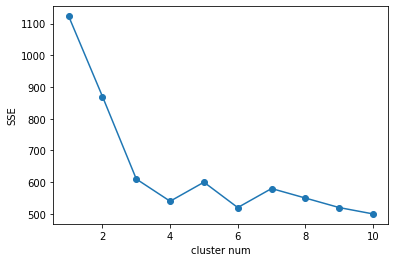

In [148]:
sse = [1120, 870, 610, 540, 600, 520, 580, 550, 520, 500]
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('cluster num')
plt.ylabel('SSE')
plt.show()

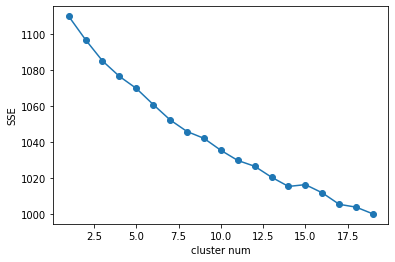

In [133]:
elbow(content_nouns__tfv_2)

In [134]:
content_nouns__tfv_2

<1172x2391 sparse matrix of type '<class 'numpy.float64'>'
	with 21469 stored elements in Compressed Sparse Row format>

In [135]:
from sklearn.cluster import KMeans
from sklearn import metrics

k_list = list(range(2,20))
s_score_list = []

for k in k_list:
  print('k:',k)

  Clustering_Method = KMeans(n_clusters=k, random_state=42)
  
  #X = model.docvecs.vectors_docs
  Clustering_Method.fit(content_nouns__tfv_2)

  # 분포 확인 
  print(pd.DataFrame(Clustering_Method.labels_)[0].value_counts())

  # silhouette_score
  s_score = metrics.silhouette_score(content_nouns__tfv_2, labels = Clustering_Method.labels_, metric='euclidean', random_state=42)
  s_score_list.append(s_score)
  print('silhouette_score:',s_score)

  print('======================')

  # 분포가 균일하지 않음. 특정 라벨만 너무 많다.

k: 2
0    673
1    499
Name: 0, dtype: int64
silhouette_score: 0.01046797091373846
k: 3
0    683
2    349
1    140
Name: 0, dtype: int64
silhouette_score: 0.012580184848458914
k: 4
2    594
0    354
3    132
1     92
Name: 0, dtype: int64
silhouette_score: 0.013059238634028213
k: 5
1    479
0    204
4    180
2    176
3    133
Name: 0, dtype: int64
silhouette_score: 0.014607844127793593
k: 6
0    432
2    208
1    162
3    126
4    125
5    119
Name: 0, dtype: int64
silhouette_score: 0.015751295588891455
k: 7
0    393
6    223
4    193
1    120
3    102
5     94
2     47
Name: 0, dtype: int64
silhouette_score: 0.017357960836908302
k: 8
2    380
6    162
7    138
0    130
3    113
5    111
4     90
1     48
Name: 0, dtype: int64
silhouette_score: 0.019908809544107835
k: 9
1    268
2    189
3    128
7    125
4    119
0    116
6     91
8     87
5     49
Name: 0, dtype: int64
silhouette_score: 0.019150795107577452
k: 10
0    235
9    161
2    147
6    134
3    122
7    110
5     85
4     71

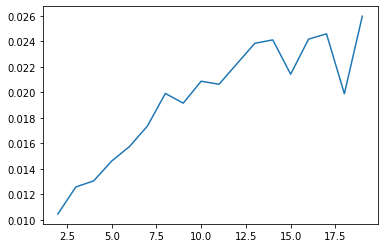

In [136]:
import matplotlib.pyplot as plt
plt.plot(k_list, s_score_list)
# elbow point가 없다. 

In [ ]:
'''
# K-means로 3개 군집으로 문서 군집화시키기
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

kmeans = KMeans(n_clusters=3, max_iter=10000, random_state=42).fit(content_nouns__tfv_2)     # 군집 개수 = 3

df['cluster'] = kmeans.labels_

score_samples = silhouette_samples(content_nouns__tfv_2, df['cluster'])

print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
df['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(content_nouns__tfv_2, df['cluster'])
print('Silhouette Analysis Score:'.format(average_score))

df.head(3)

# df.groupby('cluster')['silhouette_coeff'].mean()
'''

silhouette_samples( ) return 값의 shape (13995,)
Silhouette Analysis Score:


,상품명,리뷰,index,content_nouns,cluster,silhouette_coeff
0,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),이브랜드는 올리브영 입점전부터 써본브랜드입니다 수분크림구매시에 성분이 중요한데요 어...,0,"[이브랜드, 올리브, 입점, 브랜드, 수분, 크림, 구매, 성분, 수분, 크림, 향...",0,0.048029
1,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),전에 어찌어찌하다 자작나무 수분크림 샘플을 받아 잘 쓰고 있는 중에 행사한다니 안...,1,"[자작나무, 수분, 크림, 샘플, 행사, 타입, 일반, 수분, 크림, 수분, 크림,...",0,0.040316
2,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),올리브영 대표 클린뷰티 라운드랩 라운드랩 자작나무 수분 크림 제 피부...,2,"[올리브, 대표, 클린, 뷰티, 라운드, 라운드, 자작나무, 수분, 크림, 피부, ...",0,0.043968


In [137]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=10000, random_state=42)     # 군집 개수 = 3

# 비지도 학습이니 feature로만 학습시키고 예측
cluster_label = kmeans.fit_predict(content_nouns__tfv_2)

# 군집화한 레이블값들을 df인 a2 에 추가하기
df['cluster_label'] = cluster_label
print(df.sort_values(by=['cluster_label']))

                            상품명  ... cluster_label
3159  아비브 어성초 카밍 토너 스킨부스터 더블 기획  ...             0
2927  아비브 어성초 카밍 토너 스킨부스터 더블 기획  ...             0
2530  아비브 어성초 카밍 토너 스킨부스터 더블 기획  ...             0
2925  아비브 어성초 카밍 토너 스킨부스터 더블 기획  ...             0
2535  아비브 어성초 카밍 토너 스킨부스터 더블 기획  ...             0
...                         ...  ...           ...
2447  아비브 어성초 카밍 토너 스킨부스터 더블 기획  ...             2
2458  아비브 어성초 카밍 토너 스킨부스터 더블 기획  ...             2
2467  아비브 어성초 카밍 토너 스킨부스터 더블 기획  ...             2
2476  아비브 어성초 카밍 토너 스킨부스터 더블 기획  ...             2
2573  아비브 어성초 카밍 토너 스킨부스터 더블 기획  ...             2

[1172 rows x 5 columns]


In [ ]:
'''
# 텍스트 단어들의 어근 원형을 추출하기 위해 함수 생성
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string
# string.puncutaion에 문자열의 모든 구두점이 들어있음
# 이를 활용해서 Tokenize시킬 때 구두점들을 제외하기 위한 것
# ord('문자열') => 문자열의 ASCII코드를 반환해줌!
# dict(key, value)형태로 모든 구두점의 각 ASCII코드를 key값으로 넣어주자!
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 토큰화한 각 단어들의 원형들을 리스트로 담아서 반환
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]
# 텍스트를 Input으로 넣어서 토큰화시키고 토큰화된 단어들의 원형들을 리스트로 담아 반환
def LemNormalize(text):
    # .translate인자에 구두점 dict넣어주어서 구두점 삭제해준 상태로 토큰화시키기!
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# Tf-idf 벡터화시키면서 cusotmized해준 토큰화+어근추출 방식 tokenizer인자에 넣어주기
# 벡터화시킬 Tf-idf 도구 옵션 추가해서 구축
# 1,2gram적용, 빈도수 0.05이하, 0.85이상의 빈도수 단어들 제거
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize,
                            stop_words='english', ngram_range=(1,2),
                            min_df=0.05, max_df=0.85)
# fit_transform으로 위에서 구축한 도구로 텍스트 벡터화
ftr_vect = tfidf_vect.fit_transform(new_data['content'].values.astype('U'))


SyntaxError: ignored

In [ ]:
'''
# K-means로 3개 군집으로 문서 군집화시키기
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=10000, random_state=42)
# 비지도 학습이니 feature로만 학습시키고 예측
cluster_label = kmeans.fit_predict(ftr_vect)

# 군집화한 레이블값들을 new_data 에 추가하기
new_data['cluster_label'] = cluster_label
print(new_data.sort_values(by=['cluster_label']))

In [138]:
# 문서의 feature(단어별) cluster_centers_확인해보자
cluster_centers = kmeans.cluster_centers_
print(cluster_centers.shape)
print(cluster_centers)
# shape의 행은 클러스터 레이블, 열은 벡터화 시킨 feature(단어들)

(3, 2391)
[[0.         0.         0.         ... 0.00015991 0.         0.        ]
 [0.         0.         0.00286858 ... 0.         0.         0.        ]
 [0.01388416 0.01388416 0.00054958 ... 0.00144245 0.001073   0.00106139]]


# 상위 10개 단위 추출, 군집 리뷰 출력

In [139]:
def get_cluster_details(cluster_model, cluster_data, feature_names,
                       cluster_num, top_n_features=20):
    cluster_details = {}
    # 각 클러스터 레이블별 feature들의 center값들 내림차순으로 정렬 후의 인덱스를 반환
    center_feature_idx = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    # 개별 클러스터 레이블별로 
    for cluster_num in range(cluster_num):
        # 개별 클러스터별 정보를 담을 empty dict할당
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # 각 feature별 center값들 정렬한 인덱스 중 상위 10개만 추출
        top_ftr_idx = center_feature_idx[cluster_num, :top_n_features]
        top_ftr = [feature_names[idx] for idx in top_ftr_idx]
        # top_ftr_idx를 활용해서 상위 10개 feature들의 center값들 반환
        # 반환하게 되면 array이기 떄문에 리스트로바꾸기
        top_ftr_val = cluster_model.cluster_centers_[cluster_num, top_ftr_idx].tolist()
        
        # cluster_details 딕셔너리에다가 개별 군집 정보 넣어주기
        cluster_details[cluster_num]['top_features'] = top_ftr
        cluster_details[cluster_num]['top_featrues_value'] = top_ftr_val
        # 해당 cluster_num으로 분류된 파일명(문서들) 넣어주기
        filenames = cluster_data[cluster_data['cluster_label']==cluster_num]['리뷰']
        # filenames가 df으로 반환되기 떄문에 값들만 출력해서 array->list로 변환
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
    
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print(f"#####Cluster Num: {cluster_num}")
        print()
        print("상위 10개 feature단어들:\n", cluster_detail['top_features'])
        print()
        print(f"Cluster {cluster_num}으로 분류된 문서들:\n{cluster_detail['filenames'][:5]}")
        print('-'*20)

feature_names = tfidf_vect.get_feature_names()
cluster_details = get_cluster_details(cluster_model=kmeans,
                                     cluster_data=df,
                                     feature_names=feature_names,
                                     cluster_num=3,
                                     top_n_features=20)
print_cluster_details(cluster_details)

#####Cluster Num: 0

상위 10개 feature단어들:
 ['구매', '피부', '스킨', '진정', '아비브', '어성', '토너', '트러블', '효과', '느낌', '사용', '제형', '보습', '여드름', '제품', '라인', '수분', '정도', '패드', '아비브 어성']

Cluster 0으로 분류된 문서들:
['우선 향은 어성초 향이 약하게 느껴지긴 하는데 거의 무향에 가까운 것 같구요  제형은 완전 물스킨입니다  평소 아비브 껌딱지 팩이랑 세럼  패드를 잘 써서 별 고민없이 구매해봤는데 건성인 저한테는 수분감이 약간 부족하네요ㅜ 유분기는 아예 없고 진정에 초점이 맞춰진 토너인 것 같아요 닥토하거나  토너에 적셔서 스킨팩 해주기에 좋더라구요 건성인 저는 번정도 토너 레이어링 후에 세럼  크림까지 발라줘요 이렇게 쓰니까 양이 확확 줄어드는게 아쉽긴 하지만 ㅜㅜ 개인적으로는 가을겨울보단 여름에 딱 쓰기 좋을 것 같아요 세일할때 구매했는데 세일 많이 한다면 재구매 의사가 있고 정가로는 재구매 의사는 없습니다   어성초 패드랑 같이 쓰기 조아요 ', '기존에 새로 산 토너가 너무 안 맞아서 급하게 세일하는 토너 아무거나 산 게 신의 한 수였습니다    너무 좋아요      음    일단 진정 효과는 잘 모르겠으나  토너 단계 제품만으로 드라미틱한 진정효과를 바라는 게 무리일수도       이 토너는 정말 제가 딱 원하던 수분감이에요  제가 한 겨울에도 유분 폭발하는 파워 지성인데 그래도 토너 단계를 통해 기초적인 수분을 채워주지 않으면 속건조로 인한 트러블이 생기더라구요  근데 이 제품으로 양볼에 방울씩 떨어트려서 번 레이어드 해주면 저같은 지성피부에게 속보습 채워주고 겉도 촉촉한 딱 적당한 수분감입니다  물처럼 흐르는 타입이라 끈적임 없는 것도 너무 좋고 건성이신 분들에게는 부족할 수 있는 수분감이지만 복합성까지는 딱 적당한 수분감이에요  어차피 토너 단계 이후에 다들 앰플이나 보습제 바르니까요      대용량 나오면 더더욱 좋겠지만

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ml',
 '가격',
 '건성',
 '건조',
 '고민',
 '구매',
 '구매 사용',
 '구성',
 '기획',
 '기획 세트',
 '느낌',
 '다음',
 '대용량',
 '로션',
 '리뷰',
 '마스크',
 '마음',
 '만족',
 '보습',
 '복합',
 '복합 피부',
 '부분',
 '뾰루지',
 '사람',
 '사용',
 '사용 토너',
 '사용 피부',
 '생각',
 '성분',
 '세일',
 '세트',
 '수분',
 '스킨',
 '아누아',
 '아누아 어성',
 '아누아 토너',
 '아침',
 '어성',
 '어성 토너',
 '얼굴',
 '여드름',
 '여드름 피부',
 '여름',
 '여행',
 '올리브',
 '용량',
 '이번',
 '자극',
 '정도',
 '정착',
 '제품',
 '제형',
 '좁쌀',
 '좁쌀 여드름',
 '지성',
 '진정',
 '진정 효과',
 '처음',
 '추천',
 '크림',
 '타입',
 '토너',
 '토너 구매',
 '토너 사용',
 '토로',
 '트러블',
 '패드',
 '평소',
 '피부',
 '피부 자극',
 '피부 진정',
 '피부 타입',
 '할인',
 '향도',
 '홍조',
 '화장',
 '화장 토너',
 '화장품',
 '효과',
 '후기',
 '흡수']

In [52]:
new_data = df
new_data

,상품명,리뷰,index,content_nouns,cluster_label
0,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),이브랜드는 올리브영 입점전부터 써본브랜드입니다 수분크림구매시에 성분이 중요한데요 어...,0,"[이브랜드, 올리브, 입점, 브랜드, 수분, 크림, 구매, 성분, 수분, 크림, 향...",2
1,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),전에 어찌어찌하다 자작나무 수분크림 샘플을 받아 잘 쓰고 있는 중에 행사한다니 안...,1,"[자작나무, 수분, 크림, 샘플, 행사, 타입, 일반, 수분, 크림, 수분, 크림,...",2
2,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),올리브영 대표 클린뷰티 라운드랩 라운드랩 자작나무 수분 크림 제 피부...,2,"[올리브, 대표, 클린, 뷰티, 라운드, 라운드, 자작나무, 수분, 크림, 피부, ...",2
3,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),수분감 진짜 내가 찾던 수분만 있는 제품 유분은 기름종이 보시면 알겠지만 도 ...,3,"[수분, 수분, 제품, 유분, 기름종이, 건성, 추가, 지성, 사계절, 사용, 크림...",2
4,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),원쁠원 행사 넘 좋아요 이번달 끝나기 전에 하나 더 사놓을까 고민이 되네요 ...,4,"[행사, 이번, 나기, 고민, 여름, 수분, 크림, 김미연, 사용, 크림, 크림, ...",2
...,...,...,...,...,...
1628,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),점성도 적당하고 수분력 발림성이 모두적당해서 만족합니다,1628,"[점성, 수분, 발림, 만족]",0
1629,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),재구매템입니다 유수분도 딱 좋고 사용감도 너무 좋아요,1629,"[구매, 유수, 사용]",0
1630,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),자극없이 순하고 촉촉해서 제 동생이 재구매했습니다,1630,"[자극, 동생, 구매]",0
1631,★에바 P!CK★라운드랩 자작나무 수분크림 1+1기획(+수분패드 10매),ml 작은 것도 잇어서 휴대용으로 좋아요 더 저렴햇으몀,1631,"[ml, 휴대]",0


In [53]:
new_data = new_data[['리뷰', 'cluster_label']]

In [54]:
new_data_1 = new_data[new_data['cluster_label'] == 0]
new_data_2 = new_data[new_data['cluster_label'] == 1]
new_data_3 = new_data[new_data['cluster_label'] == 2]


In [55]:
temp = pd.read_csv('/content/drive/MyDrive/데캡디/df_score.csv')

In [56]:
temp

,Unnamed: 0,review,label,score
0,1556,기존에 새로 산 토너가 너무 안 맞아서 급하게 세일하는 토너 아무거나 산 게 신의 ...,1,0.699595
1,1516,티존은 유분이 있는 지성피부이고 볼은 중성 정도의 피부입니다 예전에 닥터지 수딩 수...,1,0.698486
2,1084,👉🏻 1. 민감성 피부에 좋습니다 피부가 예민하신 분은 어성초 77토너를 한 번 써...,1,0.698265
3,1473,아누아 어성초 77 수딩토너 🌿 💦 어성초가 피부진정이나 염증에 좋다고 들어서 구...,1,0.697749
4,1336,아누아 어성초 패드 사용해보고 너무 만족스러워서 스킨도 구매했어요 어성초 성분이 잘...,1,0.697715
...,...,...,...,...
1573,852,순하고 트러블안나고 자극없고 예민한 수부지 피부인 저한테 잘 맞앗어요 향은 무향...,0,0.167337
1574,519,선크림에 들어있던 샘플 써보고 구매했어요 순하고 자극없이 좋아요 지성피부가 써도 기...,0,0.167281
1575,1213,전에는 항상 토너패드를 썼었는데 이번엔 진짜 심기일전하고 피부 좋아져보자하고 이 토...,0,0.166849
1576,43,얼마써보지않아 효과는 엄청 보지못했지만 대용량!!좋다고 소문난 제품이어서 믿고 써보...,0,0.165426


In [57]:
temp = temp.rename(columns={'Unnamed: 0':'index'})

In [58]:
new_data = new_data.reset_index()

In [59]:
new_data

,index,리뷰,cluster_label
0,0,이브랜드는 올리브영 입점전부터 써본브랜드입니다 수분크림구매시에 성분이 중요한데요 어...,2
1,1,전에 어찌어찌하다 자작나무 수분크림 샘플을 받아 잘 쓰고 있는 중에 행사한다니 안...,2
2,2,올리브영 대표 클린뷰티 라운드랩 라운드랩 자작나무 수분 크림 제 피부...,2
3,3,수분감 진짜 내가 찾던 수분만 있는 제품 유분은 기름종이 보시면 알겠지만 도 ...,2
4,4,원쁠원 행사 넘 좋아요 이번달 끝나기 전에 하나 더 사놓을까 고민이 되네요 ...,2
...,...,...,...
1628,1628,점성도 적당하고 수분력 발림성이 모두적당해서 만족합니다,0
1629,1629,재구매템입니다 유수분도 딱 좋고 사용감도 너무 좋아요,0
1630,1630,자극없이 순하고 촉촉해서 제 동생이 재구매했습니다,0
1631,1631,ml 작은 것도 잇어서 휴대용으로 좋아요 더 저렴햇으몀,0


In [60]:
index_merge = pd.merge(new_data, temp, on='index')

In [61]:
index_merge.head()

,index,리뷰,cluster_label,review,label,score
0,0,이브랜드는 올리브영 입점전부터 써본브랜드입니다 수분크림구매시에 성분이 중요한데요 어...,2,온 가족이 쓰는 수분크림입니다. 발림성이 좋고 피부에 자극없어서 자주 애용합니다.,0,0.414710
1,1,전에 어찌어찌하다 자작나무 수분크림 샘플을 받아 잘 쓰고 있는 중에 행사한다니 안...,2,추천추천추천합니다 순해서 자극없고 발림성도 좋아요 수분감도 좋은것같아 맘에듭니다^^,0,0.175470
2,2,올리브영 대표 클린뷰티 라운드랩 라운드랩 자작나무 수분 크림 제 피부...,2,세안하고나서 수건으로 얼굴의 물기를 닦아내지않고 바로 토너를 사용하고 있어서 저한텐...,0,0.680716
3,3,수분감 진짜 내가 찾던 수분만 있는 제품 유분은 기름종이 보시면 알겠지만 도 ...,2,샘플사용해보고 좋아서 본품 구매햇어요 수분크림역할 잘하는 거 같아요 다만 용기가 불...,0,0.168633
4,4,원쁠원 행사 넘 좋아요 이번달 끝나기 전에 하나 더 사놓을까 고민이 되네요 ...,2,수부지 수분크림으로 유명하고 20ml증정해주고 세일해서 구매했어요 아직 사용은안했지...,0,0.180558


군집 예시

In [63]:
data_temp = index_merge[['review', 'cluster_label', 'score']]

In [64]:
cluster_1 = data_temp[data_temp['cluster_label'] == 0]
cluster_2 = data_temp[data_temp['cluster_label'] == 1]
cluster_3 = data_temp[data_temp['cluster_label'] == 2]

In [65]:
cluster_1_sort = cluster_1.sort_values(by=['score'], axis=0, ascending=False)
cluster_2_sort = cluster_2.sort_values(by=['score'], axis=0, ascending=False)
cluster_3_sort = cluster_3.sort_values(by=['score'], axis=0, ascending=False)

In [66]:
cluster_1_sort['review'].iloc[0]

'기존에 새로 산 토너가 너무 안 맞아서 급하게 세일하는 토너 아무거나 산 게 신의 한 수였습니다....너무 좋아요..... 음....일단 진정 효과는 잘 모르겠으나 (토너 단계 제품만으로 드라미틱한 진정효과를 바라는 게 무리일수도...??) 이 토너는 정말 제가 딱 원하던 수분감이에요. 제가 한 겨울에도 유분 폭발하는 파워 지성인데 그래도 토너 단계를 통해 기초적인 수분을 채워주지 않으면 속건조로 인한 트러블이 생기더라구요. 근데 이 제품으로 양볼에 2방울씩 떨어트려서 2번 레이어드 해주면 저같은 지성피부에게 속보습 채워주고 겉도 촉촉한 딱 적당한 수분감입니다. 물처럼 흐르는 타입이라 끈적임 없는 것도 너무 좋고 건성이신 분들에게는 부족할 수 있는 수분감이지만 복합성까지는 딱 적당한 수분감이에요. 어차피 토너 단계 이후에 다들 앰플이나 보습제 바르니까요...?? 대용량 나오면 더더욱 좋겠지만 그래도 저는 계속 재구매 의사 있습니다!! 복합성부터 지성까지 토너 한번 바꿔볼까?? 생각 하시고 계신 분들 한 번 써보시는 거 추천드려요!! '

In [67]:
cluster_1_sort['review'].iloc[1]

'티존은 유분이 있는 지성피부이고 볼은 중성 정도의 피부입니다 예전에 닥터지 수딩 수분크림? 사용했는데 볼이랑 눈쪽이 땡기는 거 같아서 복합성을 고려하여 이 제품 사봤어요  먼저 사용감이 산뜻하고 수분이 있는 게 느껴질 만큼 수부지피부에게 좋은 제품인 거 같아요 복합성인 제 피부에도 잘 맞았고 티존 또한 유분을 조절해주는 토너와 사용하니 유분도 잘 안 나와서 좋았습니다  파운데이션이랑도 궁합이 좋은 거 같았고  쿨링감은 느껴지진 않았어요  진정에 도움이 된다기보단 수분충전용으로 잘 사용할 듯해요 같이 온 패드도 좋은 거 같아요 성분도 좋아서 걱정없이 사용할 수 있었고 티존에 사용할시엔 유분이 올라오더라고요 볼만 사용했을 때는 정말 수분이 충전되는 느낌이에요 진정효과는 제가 원래 트러블 피부가 아니여서 잘은 모르겠지만..열감을 낮춰주면서 붉은기가 가라앉는 거 같아요!!'

In [68]:
cluster_2_sort['review'].iloc[0]

'요즘 마스크때문에 그런지ㅠㅠ 트러블이 괜찮아질만 하면 올라오고 피부관리 조금만 소홀하면 트러블이 올라오려는 기미가 있더라구요 .. 어성초가 진정에도 좋고 트러블에 도움이 되는거 같아서 아비브 어성초껌딱지 마스크도 저한테 잘 맞았고, 어성초 라인이 저한테 잘 맞는거 같아서 아비브토너 구매해봤어요! 요즘은 트러블 올라올거 같을때 화장솜에 듬뿍 적셔서 스킨팩 해주고 있어요! 스킨팩만 해줘도 진정이 되는거 같고 수분도 좀 채워주는 느낌이에요~ 양도 넉넉 하니 많고해서 매일 닦토 해줘도 될거 같고, 근데 닦토만 해주기엔 어성초 성분이 아까운거 같아서 저는 스킨팩을 자주 해주고 수분충전을 해줘요~ 향은 어성초 향인데 그렇게 진하지 않고 은은해서 향은 거슬리는거 없었고, 점성도 없는 말그대로 그냥 물같은 흐르는 제형의 스킨토너 입니다~ '

In [69]:
cluster_2_sort['review'].iloc[1]

'인생토너 등극한 제품입니다. 재구매한 제품이구요 사계절 모두 사용하기 좋습니다. 물토너들은 대개 바르고 나면 보습력이 좋은 편은 아닌데 이건 토너만 발라도 확실하게 보습력이 좋습니다, 향도 인공적인 향이 나지 않아서 피부에 부담이 없을 것 같고 보습력이 뛰어나면서 끈적이지도 않고 산뜻한 편입니다. 닦토로 사용하진 않고 손바닥에 적정량 덜어내어 얼굴에 바로 바릅니다! 저는 복합성+지성이지만 건성분들도 사용하기에 좋은 토너입니다 (다들 토너만 바르지는 않으니까요!) 다른 크림이나 에센스랑도 궁합이 좋은 편이고 피부진정이 급한 경우나 화장전에 피부열감을 내리기 위해 얇은 화장솜에 토너를 적셔 스킨팩을 해도 좋은 제품입니다. 그래도 일반적으로 닦아내거나 바로 흡수시키는 사용법이 제일 좋긴 합니다!(요즘 집에 닦아내는 패드가 한두통 있을텐데 그 패드로 스킨팩을 하는편이 더 합리적인 것 같아요!)'

In [71]:
cluster_3_sort['review'].iloc[0]

'아누아 어성초 77 수딩토너 🌿 💦  어성초가 피부진정이나 염증에 좋다고 들어서 구매했습니다. 앰플은 이미 사용하는 제품이 있어서 토너 제형인 어성초 77 수딩토너로 선택했어요.   수부지에 마스크 때문에 턱 위주로 트러블이 가끔 올라오는 피부입니다. 유분이 많을 때는 닦토로 사용하고, 평소에는 그냥 흡토로 사용하니까 딱 좋았습니다.   물토너라 유분감은 없고, 그렇다고 흡토한 뒤에 막 건조하지도 않아서 사계절 내내 닦토, 흡토, 토너팩으로 두루두루 잘 사용할 수 있을 것 같아요!   작은 트러블 올라왔을 때 토너팩 해주면 다음날 많이 가라앉아있어요. 어성초 함량이 높고 전성분이 순해서인지 진정효과가 좋은 것 같습니다.   그리고 각질 관리에도 도움이 되는 것 같아요. 평소처럼 일주일에 두세 번 오일클렌징 하는 것 제외하고는 따로 한 게 없는데 평소보다 부드러운 느낌입니다.'

In [70]:
cluster_3_sort['review'].iloc[1]

'코로나 시국을 맞이해서 유수분 밸러스가 많이 무너졌어요 ㅠㅠㅠ 그래서 빠른 시일내에 돌릴 방법을 찾게 되었고, 열심히 알아 보던 차에 디렉터 파이님 영상을 보고 수많은 후기를 본 후에 구매하게 되었어요 !   제품은 너무 흘러내리는 콧물 제형은 아니여서 좋았어요! 퍼바를 때 부드럽게 핸들링이 되어서 편했던거 같아요 :) 향기는 거의 안나는 편이라 향 민감하신분들도 충분히 사용하실 수 있을꺼 같아요!!  피부 타입은 전 수부지 타입인데 딱 좋았어요! 완전 추천 여름엔 지성 분들도 편안하게 쓸 수 있을꺼 같아요 건성 분들은 추가적으로 다른 제품을 덧바르시는게 좋을꺼 같아용   아쉬운 점은 제품이 튜브형이 아니라는 점 , 그리고 알갱이가 안에 있는데 피부를 마찰시켜 자극은 주지는 않지만 얼굴에 겉돌아서 좀 불편한거 같아요.. 화장 전엔 바르긴 불편할꺼 같아요 '